# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Objective
Built a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Problem Solving Methodology

### Step 1. Load the dataset
### Step 2. Data Cleaning & Preparation
### Step 3. Treatment of Null Values
### Step 4. Outliers Detection & Treatment
### Step 5. Univariate Exploratory Data Analysis
### Step 6. Model Building & Evaluation

In [2]:
# import the required libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
### Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Load the DataSet

In [3]:
# load the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the dimensions of the datset
leads.shape

(9240, 37)

In [5]:
# lets check the dataset
leads.info()

# Observation: there are null values present in the dataset, we will treat these nulls later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# lets check for duplicates
leads[leads["Prospect ID"].duplicated()==True]

# no duplicates found

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Data Cleaning & Preparation

In [8]:
# lets check % of null values for each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [9]:
# lets drop columns with null values greater than 30%
drop_cols = []
for col in leads.columns:
    if round(100*(leads[col].isnull().sum()/len(leads.index)), 2)>30:
        drop_cols.append(col)

print("dropping columns:",drop_cols)
leads.drop(drop_cols,1,inplace = True)

dropping columns: ['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [10]:
# lets check % of null values again
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

# we will treat these null values in a while

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Last Notable Activity                             0.00
A free cop

In [11]:
# lets check unique valeus for all the variables except "Prospect ID" & " Lead Number"
cols = leads.drop(["Prospect ID","Lead Number"],axis = 1)

print('\nUnique values in the dataframe - column wise:')
for i in cols:
    print(i,leads[i].unique(),'\n')
    
# we can see columns having "Select" values, which means user did not select any value for these columns


Unique values in the dataframe - column wise:
Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email ['No' 'Yes'] 

Do Not Call ['No' 'Yes'] 

Converted [0 1] 

TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Total Time Spent on Website [   0  674 1532 ...  603  483  927] 

Page Views Per Visit [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.

In [12]:
# lets get the list of columns having "Select" values
print("Column name containing value Select:\n")
for col in cols:
    for value in leads[col].values:
        if value == "Select":
            print(col)
            break
# lets check columns with "Select" values one by one

Column name containing value Select:

Specialization
How did you hear about X Education
Lead Profile
City


In [13]:
# lets check "Specialization" for "Select"
print("Count of different values for Specialization:",leads["Specialization"].value_counts())

# There are 1942 records present in the dataset with Specialization value as "Select", we will drop these records
print("\nDropping the rows with value Select" )
leads = leads[~(leads['Specialization'] == "Select")]
      
print("\nCount of final values for Specialization:",leads["Specialization"].value_counts())

Count of different values for Specialization: Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Dropping the rows with value Select

Count of final values for Specialization: Finance Management                   976


In [14]:
# lets check "How did you hear about X Education" for "Select"
print("How did you hear about x education values:\n",leads["How did you hear about X Education"].value_counts())
# majority of the records have "Select" for this fields, lets drop the column

print("\nDropping the field as it has too many rows with Select Value")
leads = leads.drop("How did you hear about X Education",1)

How did you hear about x education values:
 Select                   3142
Online Search             792
Word Of Mouth             345
Student of SomeSchool     305
Other                     180
Multiple Sources          148
Social Media               67
Advertisements             67
Email                      25
SMS                        22
Name: How did you hear about X Education, dtype: int64

Dropping the field as it has too many rows with Select Value


In [15]:
# lets check "Lead Profile" for "Select"

print("Lead Profile Values:",leads["Lead Profile"].value_counts())
print("\nDropping the field as it has too many rows with Select Value")
leads = leads.drop("Lead Profile",1)

Lead Profile Values: Select                         2553
Potential Lead                 1451
Other Leads                     417
Student of SomeSchool           140
Lateral Student                  23
Dual Specialization Student      18
Name: Lead Profile, dtype: int64

Dropping the field as it has too many rows with Select Value


In [16]:
# lets check "City" for "Select"
print("City values:",leads["City"].value_counts())

# majority of the records have only 2 values for this field "Mumbai" & "Select", we can drop this column
print("\nDropping the field as it has too many rows with Select Value")
leads = leads.drop("City",1)

City values: Mumbai                         3137
Thane & Outskirts               724
Other Cities                    660
Select                          474
Other Cities of Maharashtra     435
Other Metro Cities              376
Tier II Cities                   74
Name: City, dtype: int64

Dropping the field as it has too many rows with Select Value


We are done treating "Select" Values, now lets correct other values

In [17]:
# field Lead Source has values like google & Google, lets make it "google"
leads["Lead Source"] = leads["Lead Source"].replace("Google","google")

# lets check whether the value has been corrected or not
leads["Lead Source"].unique()

array(['Direct Traffic', 'Olark Chat', 'google', 'Organic Search',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', nan, 'welearnblog_Home', 'youtubechannel', 'testone',
       'Press_Release', 'NC_EDM'], dtype=object)

We have made all the corrections now, lets check for variable with single values or almost no variation and drop such variables

In [18]:
# lets check the variations for each column

for col in leads.drop(["Prospect ID","Converted","Lead Number"],1).columns:
    print("column name:",col,"\n",leads[col].value_counts(),"\n\n")

column name: Lead Origin 
 Landing Page Submission    4812
API                        2043
Lead Add Form               417
Lead Import                  25
Quick Add Form                1
Name: Lead Origin, dtype: int64 


column name: Lead Source 
 Direct Traffic       2456
google               2323
Olark Chat           1079
Organic Search        906
Reference             390
Referral Sites         76
Facebook               25
Welingak Website       15
bing                    5
Click2call              4
Press_Release           2
Social Media            2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64 


column name: Do Not Email 
 No     6684
Yes     614
Name: Do Not Email, dtype: int64 


column name: Do Not Call 
 No     7296
Yes       2
Name: Do Not Call, dtype: int64 


column name: TotalVisits 
 2.0      1325
0.0    

* Based on above stats we can we can drop following features as these features do not have much variation
1. Do Not Call
2. Search
3. Magazine
4. Newspaper Article
5. X Education Forums
6. Newspaper
7. Digital Advertisement
8. Through Recommendations
9. Receive More Updates About Our Courses 
10. Update me on Supply Chain Content
11. Get updates on DM Content
12. I agree to pay the amount through cheque
13. What matters most to you in choosing a course 
14. Country

In [19]:
# lets drop all the columns mentioned above

leads.drop(['Do Not Call', 'Country','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

# 3. Treat Null Values

##### Lets treat null values now

In [20]:
# check for null values
leads.isnull().sum().sort_values(ascending = False)

What is your current occupation           2677
Specialization                            1438
Page Views Per Visit                        68
TotalVisits                                 68
Last Activity                               49
Lead Source                                  8
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
Lead Number                                  0
Prospect ID                                  0
dtype: int64

In [21]:
# lets check % of null values for each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

What is your current occupation           36.68
Specialization                            19.70
Page Views Per Visit                       0.93
TotalVisits                                0.93
Last Activity                              0.67
Lead Source                                0.11
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Email                               0.00
Lead Origin                                0.00
Lead Number                                0.00
Prospect ID                                0.00
dtype: float64

In [22]:
# lets check What is your current occupation field

print("\nNo. of Null Values:",leads["What is your current occupation"].isnull().sum())
print("Check different values:\n",leads["What is your current occupation"].value_counts())

# lets replace the null values with the most frequent value
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan,"Unemployed")

print("\nNo. of Null Values after treating null values:",leads["What is your current occupation"].isnull().sum())
print("Check different values:\n",leads["What is your current occupation"].value_counts())


No. of Null Values: 2677
Check different values:
 Unemployed              3772
Working Professional     679
Student                  138
Other                     15
Housewife                 10
Businessman                7
Name: What is your current occupation, dtype: int64

No. of Null Values after treating null values: 0
Check different values:
 Unemployed              6449
Working Professional     679
Student                  138
Other                     15
Housewife                 10
Businessman                7
Name: What is your current occupation, dtype: int64


In [23]:
# lets check What is your current occupation field

print("\nNo. of Null Values:",leads["Specialization"].isnull().sum())
print("Check different values:\n",leads["Specialization"].value_counts())

# we will remove the rows with null values
leads = leads[~pd.isnull(leads['Specialization'])]

print("\nNo. of Null Values after treating null values:",leads["Specialization"].isnull().sum())
print("Check different values:\n",leads["Specialization"].value_counts())


No. of Null Values: 1438
Check different values:
 Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

No. of Null Values after treating null values: 0
Check different values:
 Finance Management                   976
Human Resource Management            848
Marketing Managemen

In [24]:
# lets check Page Views Per Visit field
print("\nNo. of Null Values for Page Views Per Visit:",leads["Page Views Per Visit"].isnull().sum())
print("Describe Page Views Per Visit:",leads["Page Views Per Visit"].value_counts())

# we will remove the records with null values
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

print("\nNo. of Null Values for Page Views Per Visit after treatment:",leads["Page Views Per Visit"].isnull().sum())


No. of Null Values for Page Views Per Visit: 61
Describe Page Views Per Visit: 2.00     1311
3.00      976
4.00      792
0.00      475
5.00      453
1.00      321
6.00      211
2.50      206
1.50      188
7.00      113
8.00       76
3.50       74
2.33       51
1.67       49
2.67       47
1.33       42
9.00       40
4.50       33
10.00      22
3.33       21
1.75       19
2.25       18
5.50       17
1.25       16
11.00      16
3.67       14
1.80       10
1.40       10
2.75        9
6.50        9
         ... 
14.50       1
11.50       1
4.17        1
6.71        1
3.60        1
2.57        1
2.14        1
55.00       1
1.17        1
8.21        1
2.38        1
1.63        1
2.13        1
1.45        1
1.93        1
2.09        1
2.56        1
2.45        1
2.63        1
1.48        1
1.86        1
1.22        1
1.27        1
6.67        1
8.33        1
1.54        1
5.33        1
3.17        1
6.33        1
3.80        1
Name: Page Views Per Visit, Length: 105, dtype: int64

No. of Null

In [25]:
# lets check TotalVisits field
print("\nNo. of Null Values:",leads["TotalVisits"].isnull().sum())
# no null values left


No. of Null Values: 0


In [26]:
# lets check Values for Page Views Per Visit field
print("\nNo. of Null Values for Last Activity:",leads["Last Activity"].isnull().sum())
# no null values left


No. of Null Values for Last Activity: 0


In [27]:
# lets check the column 'Lead Source'
print("\nNo. of Null Values for Lead Source:",leads["Lead Source"].isnull().sum())
print("Describe Lead Source:",leads["Lead Source"].value_counts())

# we will remove the rows with null values
leads = leads[~pd.isnull(leads['Lead Source'])]


No. of Null Values for Lead Source: 7
Describe Lead Source: Direct Traffic       2381
google               1969
Organic Search        787
Reference             332
Olark Chat            242
Referral Sites         35
Welingak Website       15
Facebook               14
Click2call              4
Press_Release           2
bing                    2
Social Media            2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64


In [28]:
# lets check % of null values again
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Lead Number                               0.0
Prospect ID                               0.0
dtype: float64

We have treated all the null values

# 4. Outliers Detection & Treatment

In [29]:
# lets drop "Prospect ID" and "Lead Number" because are of no use in our analysis
leads = leads.drop(["Prospect ID", "Lead Number"],1)

In [30]:
leads.info()

# lets check numeric fields TotalVisits, Total Time Spent on Website,Page Views Per Visit for outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 12 columns):
Lead Origin                               5792 non-null object
Lead Source                               5792 non-null object
Do Not Email                              5792 non-null object
Converted                                 5792 non-null int64
TotalVisits                               5792 non-null float64
Total Time Spent on Website               5792 non-null int64
Page Views Per Visit                      5792 non-null float64
Last Activity                             5792 non-null object
Specialization                            5792 non-null object
What is your current occupation           5792 non-null object
A free copy of Mastering The Interview    5792 non-null object
Last Notable Activity                     5792 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 588.2+ KB


In [31]:
def outlier_treatment(data ,field):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    plt.boxplot(data[field])
    Q1 = data[field].quantile(0.05)
    Q3 = data[field].quantile(0.95)
    IQR = Q3 - Q1
    data = data[(data[field]>= Q1) & (data[field] <= Q3)]
    plt.title("Before Outlier Treatment")
    
    plt.subplot(1,2,2)
    plt.boxplot(data[field])
    plt.title("After Outlier Treatment")
    return(data)

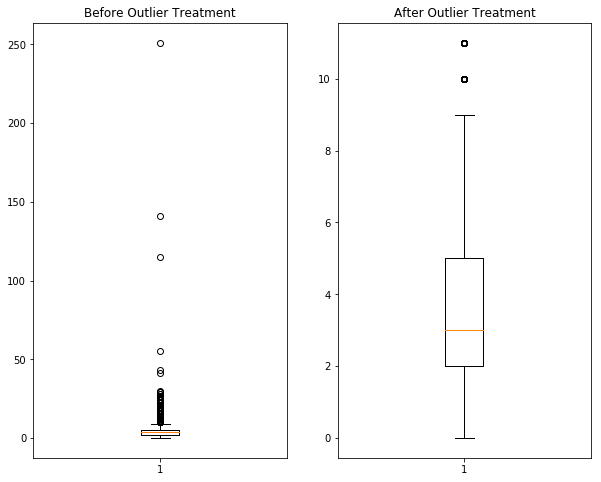

In [32]:
leads = outlier_treatment(leads,"TotalVisits")

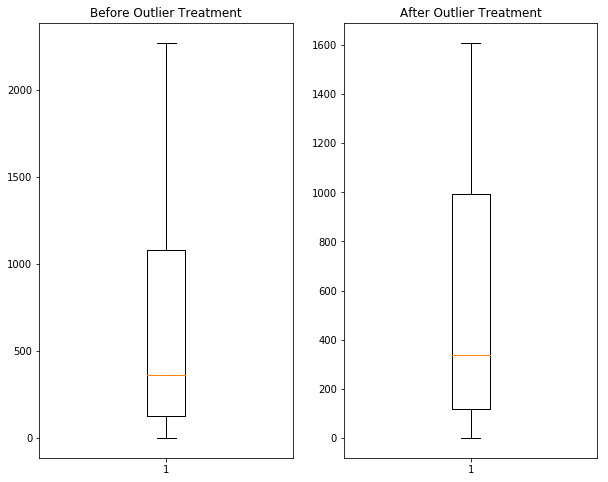

In [33]:
leads = outlier_treatment(leads,"Total Time Spent on Website")

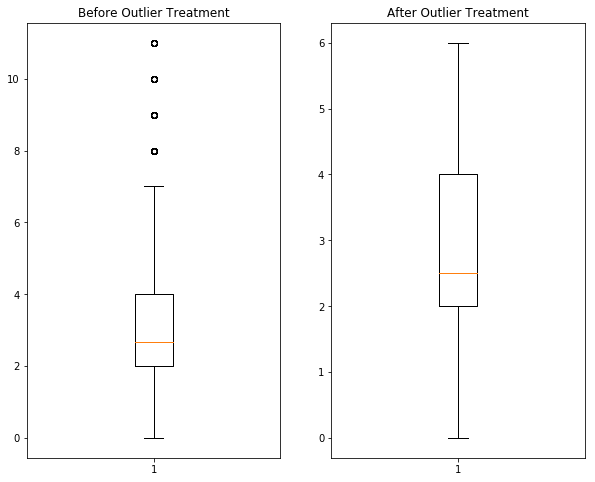

In [34]:
leads = outlier_treatment(leads,"Page Views Per Visit")

We have succesfully treated the outliers, lets perform EDA now

# 5. Univariate Exploratory Data Analysis

In [35]:
# lets take a copy of the dataset to perform eda, we are taking a copy because we would create "binning" variables 
# for the fields having more than 30 unique values
leads_eda = pd.DataFrame(leads).copy()

In [36]:
leads_eda.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Yes,Email Opened
9,API,google,No,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,No,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [37]:
# function for univariate analysis
# if an integer variable has more than 30 unique values, we will create bins for the variable
def univariate_plot(data,col):            
    if data[col].nunique() > 30:
        col_bins = col+"_bins"
        data[col_bins] = pd.cut(data[col], 8, duplicates = 'drop') # creating bins                                  
        sns.countplot(data[col_bins]) # plot for binned variables
        plt.xlabel(col_bins,fontsize = 15)
    else:        
        sns.countplot(data[col]) # plot for non binned variables
        plt.xlabel(col,fontsize = 15)
    
    plt.ylabel('Frequency',fontsize = 15)
    xticks(rotation = 30)    

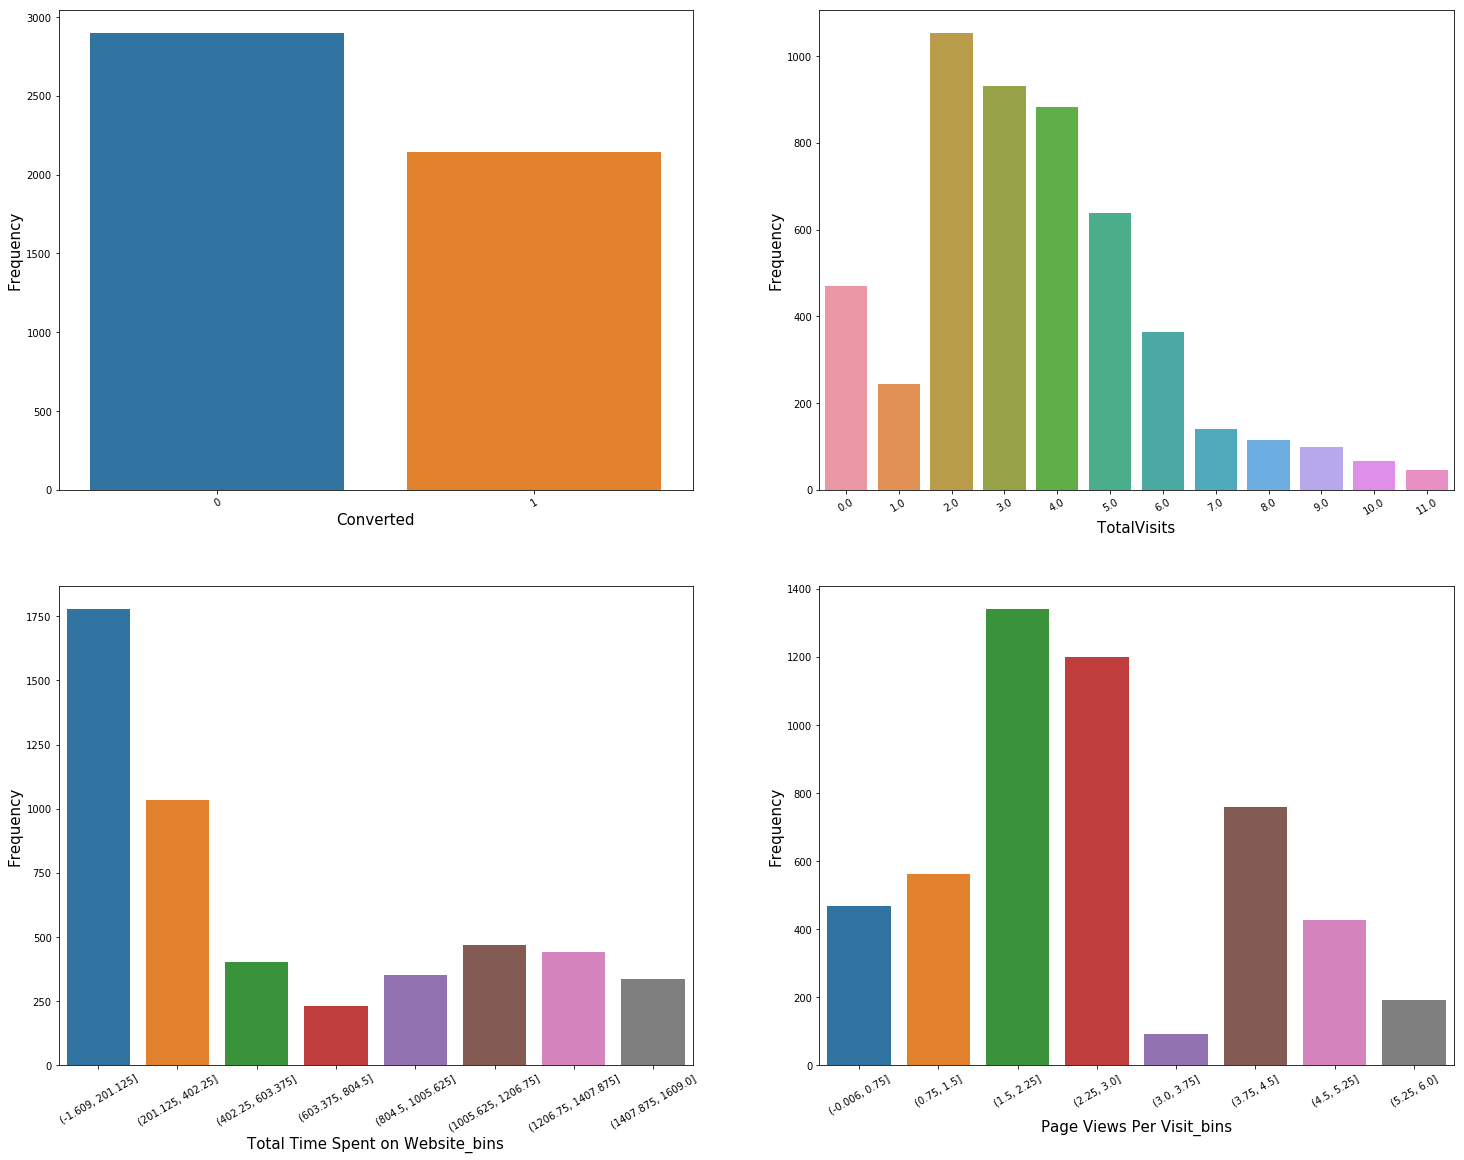

In [38]:
# lets perform univariate analysis for numeric type variables
plt.figure(figsize=(25,30))
fin = []
cols = leads_eda.columns
for col in cols:
    if leads_eda[col].dtypes != 'O': # getting the list of numeric variables
        fin.append(col)
        
for idx,col in enumerate(fin): # plotting for numeric variables
    plt.subplot(3, 2, idx+1)
    univariate_plot(leads_eda,col)          

#### Observation from above plots:
1. Converted: column has good reprsentation for both the possible values
2. Total Time Spent onf website: most of the visitors spent less than 402 seconds on the website

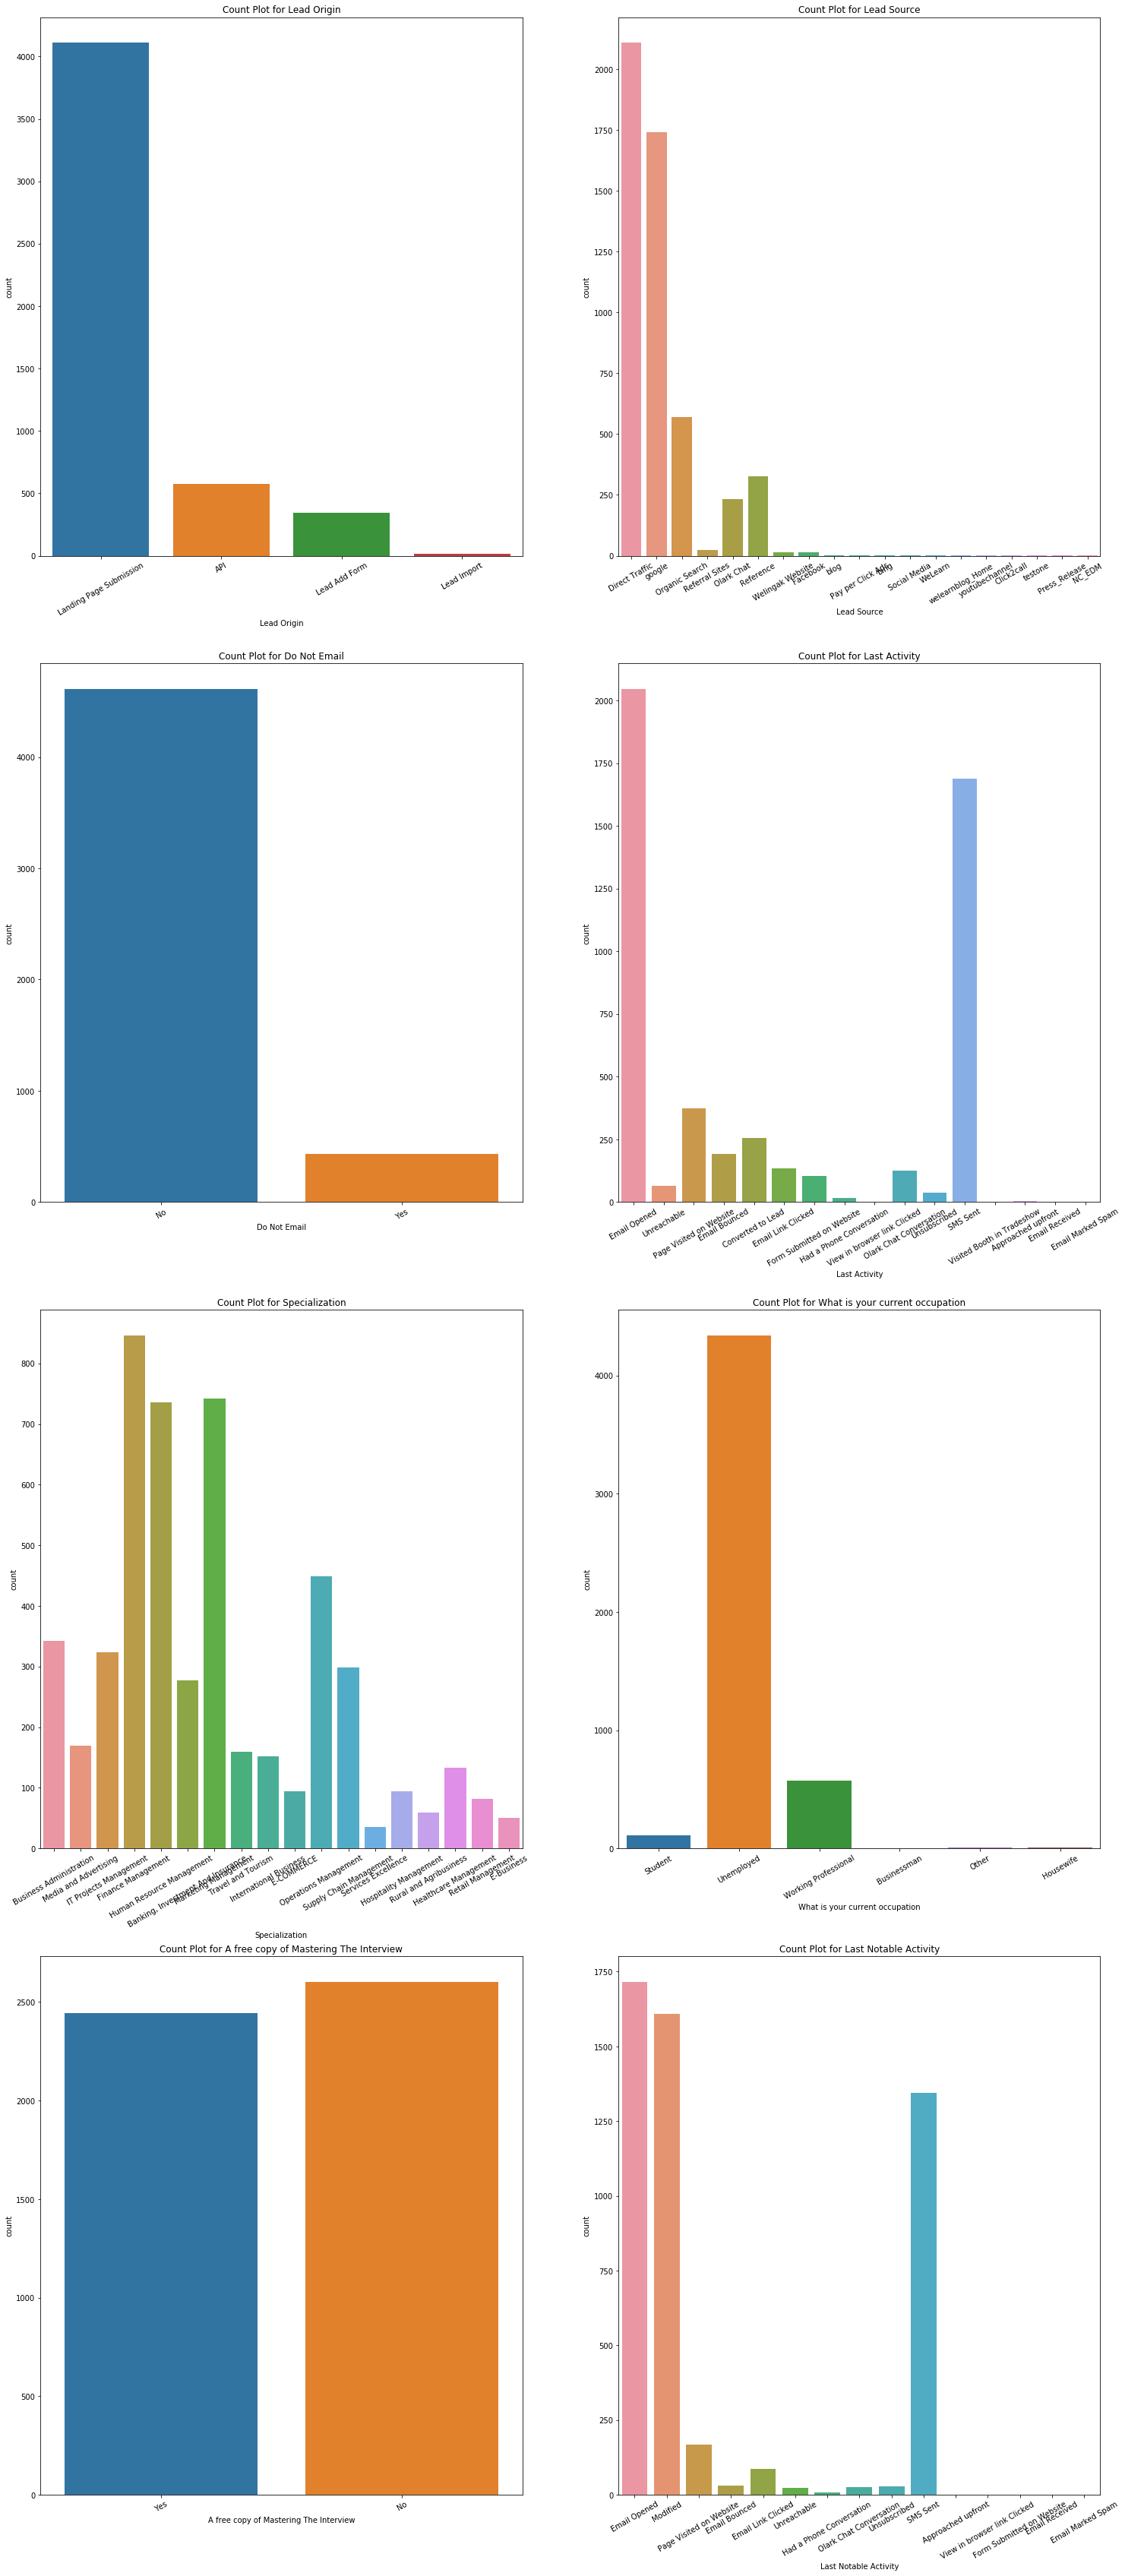

In [39]:
# lets perform univariate analysis for non numeric variables
fin = []
cols = leads_eda.columns
for col in cols:
    if leads_eda[col].dtypes == 'O': # getting the list of non numeric variables
        fin.append(col)

plt.figure(figsize=(25,60)) # plotting graphs for non numeric variables
for idx,col in enumerate(fin):            
    plt.subplot(4, 2, idx+1)
    sns.countplot(leads_eda[col])
    plt.title("Count Plot for "+ col)
    xticks(rotation = 30)

plt.show()

### Observations from above graphs:
1. Lead Origin : majority of the leads originate from  "Lending Page Submission"
2. Direct Traffic & google are few of the top Lead Sources
3. Do not Email: Majority of the leads seems to have selected NO
4. Last Activity : for majority of the leads, last activity is either "Email Opened" or "SMS Sent"
5. Specialization: data is evenly distributed for this column
6. What is your current occupation: majority of the leads are unemployed.



In [40]:
print(len(leads.index))
print(len(leads.index)/9240)

5045
0.545995670995671


We are left with around 54% of the original dataset now

In [41]:
# lets check whether the dataset is balanced or not
len(leads[leads["Converted"]==1])/len(leads.index)

0.42537165510406344

We have balanced dataset.

# Dummy Variable Creation

Lets create dummy variables for the categorical features present in the data

In [42]:
# lets find out categorical variables
obj = [col        for col in leads.columns     if leads[col].dtype == "O"]
obj

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [43]:
# Create dummy variables (except Prospect ID and ) using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']], drop_first=True)

In [44]:
# lets drop the variables for which we have created the dummy variables above
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization'],1)

In [45]:
leads = pd.concat([leads,dummy],1)
leads.shape

(5045, 78)

In [46]:
leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activi

In [47]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_NC_EDM,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,2.0,71,2.00,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [48]:
# Import the required library

from sklearn.model_selection import train_test_split

In [49]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,2.0,71,2.00,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,4.0,58,4.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Put the target variable in y

y = leads['Converted']

y.head()

2     1
3     0
8     0
9     0
11    1
Name: Converted, dtype: int64

In [51]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [53]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7829,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7723,0.181818,0.857054,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8347,0.363636,0.817278,0.666667,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8559,0.272727,0.323804,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6927,0.272727,0.090740,0.500000,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 6. Model Building

In [54]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', False, 32),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 44),
 ('Lead Source_blog', False, 63),
 ('Lead Source_google', False, 8),
 ('Lead Source_testone', False, 36),
 ('Lead Source_welearnblog_Home', False, 34),
 ('Lead Source_youtubechannel', False, 22),
 ('Do Not Email_Yes', True, 1),
 (

In [57]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [58]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [59]:
# Import statsmodels

import statsmodels.api as sm

In [60]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3515
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.5
Date:                Sat, 01 Feb 2020   Deviance:                       2873.1
Time:                        00:54:48   Pearson chi2:                 3.47e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0894      0.334      0.267      0.789      -0.566       0.745
Total Time Spent on Website                              3.5754      0.162     22.037      0.000       3.257       3.893
Lead Origin_Landing Page Submission                     -1.4413      0.143    -10.064      0.000      -1.722      -1.161
Lead Origin_Lead Add Form                                1.3681      1.450      0.943      0.346      -1.474       4.211
Lead Source_Reference                                    2.0831      1.491      1.397      0.162      -0.839       5.005
Lead Source_Welingak Website                            23.0206   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
Do Not Email_Yes                                        -1.5551      0.250     -6.222      0.000      -2.045      -1.065
Last Activity_Had a Phone Conversation                   2.5548      1.087      2.351      0.019       0.425       4.685
Last Activity_SMS Sent                                   1.1958      0.099     12.018      0.000       1.001       1.391
Last Activity_Unsubscribed                               1.5043      0.562      2.677      0.007       0.403       2.606
What is your current occupation_Housewife               23.3407   2.54e+04      0.001      0.999   -4.98e+04    4.99e+04
What is your current occupation_Other                   -2.1029      1.103     -1.906      0.057      -4.265       0.059
What is your current occupation_Unemployed              -1.0535      0.312     -3.373      0.001      -1.666      -0.441
What is your current occupation_Working Professional     2.1396      0.390      5.493      0.000       1.376       2.903
Last Notable Activity_Modified                          -0.8080      0.108     -7.476      0.000      -1.020      -0.596
Last Notable Activity_Unreachable                        3.0473      0.894      3.408      0.001       1.295       4.800
========================================================================================================================
"""

In [61]:
    # Import 'variance_inflation_factor'

    from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,118.12
3,Lead Source_Reference,113.72
11,What is your current occupation_Unemployed,8.46
1,Lead Origin_Landing Page Submission,7.15
4,Lead Source_Welingak Website,5.00
0,Total Time Spent on Website,2.36
12,What is your current occupation_Working Profes...,2.01
7,Last Activity_SMS Sent,1.61
13,Last Notable Activity_Modified,1.57
5,Do Not Email_Yes,1.26


In [63]:
# p-value & VIF for Lead Origin_Lead Add Form is high, lets drop this column
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3516
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1437.0
Date:                Sat, 01 Feb 2020   Deviance:                       2873.9
Time:                        00:54:49   Pearson chi2:                 3.47e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0990      0.334      0.296      0.767      -0.556       0.754
Total Time Spent on Website                              3.5710      0.162     22.026      0.000       3.253       3.889
Lead Origin_Landing Page Submission                     -1.4503      0.143    -10.145      0.000      -1.730      -1.170
Lead Source_Reference                                    3.4400      0.398      8.648      0.000       2.660       4.220
Lead Source_Welingak Website                            24.3773   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
Do Not Email_Yes                                        -1.5559      0.250     -6.225      0.000      -2.046      -1.066
Last Activity_Had a Phone Conversation                   2.5531      1.087      2.350      0.019       0.423       4.683
Last Activity_SMS Sent                                   1.1940      0.099     12.006      0.000       0.999       1.389
Last Activity_Unsubscribed                               1.5034      0.562      2.676      0.007       0.402       2.605
What is your current occupation_Housewife               23.3411   2.54e+04      0.001      0.999   -4.98e+04    4.99e+04
What is your current occupation_Other                   -2.1074      1.104     -1.909      0.056      -4.271       0.056
What is your current occupation_Unemployed              -1.0516      0.312     -3.368      0.001      -1.664      -0.440
What is your current occupation_Working Professional     2.1385      0.389      5.491      0.000       1.375       2.902
Last Notable Activity_Modified                          -0.8072      0.108     -7.470      0.000      -1.019      -0.595
Last Notable Activity_Unreachable                        3.0456      0.894      3.406      0.001       1.293       4.798
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,8.42
1,Lead Origin_Landing Page Submission,7.13
0,Total Time Spent on Website,2.35
11,What is your current occupation_Working Profes...,2.01
6,Last Activity_SMS Sent,1.61
12,Last Notable Activity_Modified,1.57
2,Lead Source_Reference,1.55
4,Do Not Email_Yes,1.26
7,Last Activity_Unsubscribed,1.11
3,Lead Source_Welingak Website,1.02


In [66]:
# p-value for this field is too high, lets drop
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3517
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1445.8
Date:                Sat, 01 Feb 2020   Deviance:                       2891.7
Time:                        00:54:49   Pearson chi2:                 3.47e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1787      0.333      0.536      0.592      -0.475       0.832
Total Time Spent on Website                              3.5400      0.162     21.906      0.000       3.223       3.857
Lead Origin_Landing Page Submission                     -1.5273      0.142    -10.773      0.000      -1.805      -1.249
Lead Source_Reference                                    3.3490      0.397      8.438      0.000       2.571       4.127
Do Not Email_Yes                                        -1.5630      0.250     -6.251      0.000      -2.053      -1.073
Last Activity_Had a Phone Conversation                   2.5438      1.086      2.342      0.019       0.415       4.672
Last Activity_SMS Sent                                   1.1875      0.099     11.978      0.000       0.993       1.382
Last Activity_Unsubscribed                               1.5000      0.561      2.672      0.008       0.400       2.600
What is your current occupation_Housewife               22.3465   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                   -2.1455      1.109     -1.935      0.053      -4.319       0.028
What is your current occupation_Unemployed              -1.0381      0.312     -3.328      0.001      -1.650      -0.427
What is your current occupation_Working Professional     2.1297      0.389      5.471      0.000       1.367       2.893
Last Notable Activity_Modified                          -0.8054      0.108     -7.483      0.000      -1.016      -0.594
Last Notable Activity_Unreachable                        3.0343      0.894      3.393      0.001       1.281       4.787
========================================================================================================================
"""

In [68]:
# p-value for this field is too high, lets drop
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [69]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3518
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.7
Date:                Sat, 01 Feb 2020   Deviance:                       2899.4
Time:                        00:54:49   Pearson chi2:                 3.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3946      0.321      1.228      0.220      -0.235       1.025
Total Time Spent on Website                              3.5398      0.161     21.925      0.000       3.223       3.856
Lead Origin_Landing Page Submission                     -1.5215      0.142    -10.737      0.000      -1.799      -1.244
Lead Source_Reference                                    3.3511      0.397      8.445      0.000       2.573       4.129
Do Not Email_Yes                                        -1.5700      0.250     -6.284      0.000      -2.060      -1.080
Last Activity_Had a Phone Conversation                   2.5407      1.086      2.339      0.019       0.412       4.669
Last Activity_SMS Sent                                   1.1849      0.099     11.950      0.000       0.991       1.379
Last Activity_Unsubscribed                               1.5056      0.561      2.683      0.007       0.406       2.606
What is your current occupation_Other                   -2.3695      1.105     -2.145      0.032      -4.535      -0.204
What is your current occupation_Unemployed              -1.2597      0.298     -4.222      0.000      -1.844      -0.675
What is your current occupation_Working Professional     1.9075      0.378      5.045      0.000       1.166       2.649
Last Notable Activity_Modified                          -0.7975      0.107     -7.435      0.000      -1.008      -0.587
Last Notable Activity_Unreachable                        3.0357      0.895      3.393      0.001       1.282       4.789
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,8.14
1,Lead Origin_Landing Page Submission,6.94
0,Total Time Spent on Website,2.34
9,What is your current occupation_Working Profes...,1.98
5,Last Activity_SMS Sent,1.61
10,Last Notable Activity_Modified,1.57
2,Lead Source_Reference,1.52
3,Do Not Email_Yes,1.26
6,Last Activity_Unsubscribed,1.11
7,What is your current occupation_Other,1.02


In [71]:
# VIF for this field is too high, lets drop
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3519
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.6
Date:                Sat, 01 Feb 2020   Deviance:                       2917.1
Time:                        00:54:49   Pearson chi2:                 3.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8240      0.143     -5.757      0.000      -1.104      -0.543
Total Time Spent on Website                              3.5269      0.161     21.938      0.000       3.212       3.842
Lead Origin_Landing Page Submission                     -1.5113      0.141    -10.693      0.000      -1.788      -1.234
Lead Source_Reference                                    3.4311      0.395      8.677      0.000       2.656       4.206
Do Not Email_Yes                                        -1.5680      0.250     -6.273      0.000      -2.058      -1.078
Last Activity_Had a Phone Conversation                   2.4986      1.086      2.302      0.021       0.371       4.626
Last Activity_SMS Sent                                   1.1557      0.098     11.745      0.000       0.963       1.349
Last Activity_Unsubscribed                               1.4611      0.560      2.607      0.009       0.363       2.560
What is your current occupation_Other                   -1.1285      1.061     -1.064      0.288      -3.208       0.951
What is your current occupation_Working Professional     3.1320      0.244     12.843      0.000       2.654       3.610
Last Notable Activity_Modified                          -0.8080      0.107     -7.549      0.000      -1.018      -0.598
Last Notable Activity_Unreachable                        2.9879      0.894      3.343      0.001       1.236       4.740
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Landing Page Submission,2.68
0,Total Time Spent on Website,2.15
5,Last Activity_SMS Sent,1.55
9,Last Notable Activity_Modified,1.46
8,What is your current occupation_Working Profes...,1.28
3,Do Not Email_Yes,1.25
2,Lead Source_Reference,1.21
6,Last Activity_Unsubscribed,1.11
4,Last Activity_Had a Phone Conversation,1.01
7,What is your current occupation_Other,1.01


In [74]:
# p-value for this field is too high, lets drop
X_train.drop('What is your current occupation_Other', axis = 1, inplace = True)

In [75]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3531
Model:                            GLM   Df Residuals:                     3520
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1459.1
Date:                Sat, 01 Feb 2020   Deviance:                       2918.3
Time:                        00:54:50   Pearson chi2:                 3.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8307      0.143     -5.810      0.000      -1.111      -0.550
Total Time Spent on Website                              3.5182      0.160     21.926      0.000       3.204       3.833
Lead Origin_Landing Page Submission                     -1.5007      0.141    -10.646      0.000      -1.777      -1.224
Lead Source_Reference                                    3.4402      0.395      8.701      0.000       2.665       4.215
Do Not Email_Yes                                        -1.5651      0.250     -6.264      0.000      -2.055      -1.075
Last Activity_Had a Phone Conversation                   2.5009      1.085      2.305      0.021       0.374       4.628
Last Activity_SMS Sent                                   1.1562      0.098     11.751      0.000       0.963       1.349
Last Activity_Unsubscribed                               1.4598      0.560      2.606      0.009       0.362       2.558
What is your current occupation_Working Professional     3.1346      0.244     12.856      0.000       2.657       3.613
Last Notable Activity_Modified                          -0.8144      0.107     -7.618      0.000      -1.024      -0.605
Last Notable Activity_Unreachable                        2.9861      0.893      3.343      0.001       1.235       4.737
========================================================================================================================
"""

In [76]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,Lead Origin_Landing Page Submission,2.68
0,Total Time Spent on Website,2.14
5,Last Activity_SMS Sent,1.55
8,Last Notable Activity_Modified,1.46
7,What is your current occupation_Working Profes...,1.28
3,Do Not Email_Yes,1.25
2,Lead Source_Reference,1.21
6,Last Activity_Unsubscribed,1.11
4,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.01


We have finally got a set of features with p-values & VIF in permissible limit , now lets evaluate the model

# 7. Model Evaluation

In [77]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

7829    0.161776
7723    0.664599
8347    0.694536
8559    0.118512
6927    0.298182
6334    0.157696
2887    0.146245
2437    0.047358
3532    0.994537
2541    0.253695
dtype: float64

In [78]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
7829,1,0.161776
7723,0,0.664599
8347,1,0.694536
8559,0,0.118512
6927,0,0.298182


In [79]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
7829,1,0.161776,0
7723,0,0.664599,1
8347,1,0.694536,1
8559,0,0.118512,0
6927,0,0.298182,0


In [80]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [81]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1800  254]
 [ 412 1065]]


In [82]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8113848768054376


In [83]:
# Let's evaluate the other metrics as wella

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculate the sensitivity

TP/(TP+FN)

0.7210561949898443

In [85]:
# Calculate the specificity

TN/(TN+FP)

0.8763388510223953

In [86]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [88]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

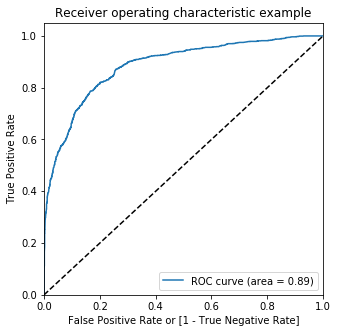

In [89]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [90]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7829,1,0.161776,0,1,1,0,0,0,0,0,0,0,0
7723,0,0.664599,1,1,1,1,1,1,1,1,0,0,0
8347,1,0.694536,1,1,1,1,1,1,1,1,0,0,0
8559,0,0.118512,0,1,1,0,0,0,0,0,0,0,0
6927,0,0.298182,0,1,1,1,0,0,0,0,0,0,0


In [91]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.418295  1.000000  0.000000
0.1   0.1  0.589351  0.972241  0.314021
0.2   0.2  0.754460  0.914692  0.639241
0.3   0.3  0.795809  0.868653  0.743427
0.4   0.4  0.813651  0.786053  0.833496
0.5   0.5  0.811385  0.721056  0.876339
0.6   0.6  0.794959  0.633717  0.910906
0.7   0.7  0.785330  0.565335  0.943525
0.8   0.8  0.759558  0.465809  0.970789
0.9   0.9  0.719060  0.340555  0.991237


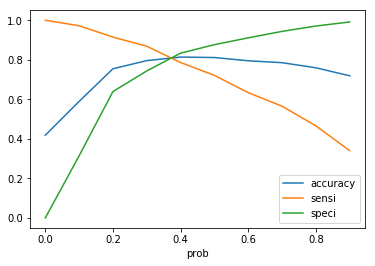

In [92]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We have intersection at around cut off value 0f 0.4

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7829,1,0.161776,0,1,1,0,0,0,0,0,0,0,0,0
7723,0,0.664599,1,1,1,1,1,1,1,1,0,0,0,1
8347,1,0.694536,1,1,1,1,1,1,1,1,0,0,0,1
8559,0,0.118512,0,1,1,0,0,0,0,0,0,0,0,0
6927,0,0.298182,0,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136505239308978

In [95]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1712,  342],
       [ 316, 1161]], dtype=int64)

In [96]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Calculate Sensitivity

TP/(TP+FN)

0.7860528097494922


### Let's now make predicitons on the test set.

In [98]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1901,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
477,0.272727,0.134866,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4176,0.272727,0.310752,0.500000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2269,0.363636,0.186451,0.666667,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,0.454545,0.551274,0.416667,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [99]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
1901,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0
477,0.134866,1,0,0,0,0,0,1,0,0,0,1,0,1,0
4176,0.310752,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2269,0.186451,1,0,0,0,0,0,1,0,0,0,1,0,0,0
895,0.551274,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [100]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [101]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Origin_Lead Add Form','Lead Source_Welingak Website','What is your current occupation_Housewife',
             'What is your current occupation_Unemployed','What is your current occupation_Other'], 1, inplace = True)

In [102]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [103]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
# Let's see the head

y_pred_1.head()

,0
1901,0.303496
477,0.180186
4176,0.224758
2269,0.373031
895,0.230354


In [105]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [106]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.303496
1,0,0.180186
2,0,0.224758
3,1,0.373031
4,0,0.230354


In [109]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [110]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.303496
1,0,0.180186
2,0,0.224758
3,1,0.373031
4,0,0.230354


In [111]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [112]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.303496,0
1,0,0.180186,0
2,0,0.224758,0
3,1,0.373031,0
4,0,0.230354,0


In [113]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7912813738441216

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[688, 157],
       [159, 510]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Calculate sensitivity
TP / float(TP+FN)

0.7623318385650224

In [117]:
# Calculate specificity
TN / float(TN+FP)

0.8142011834319527

# Precision Recall View

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1800,  254],
       [ 412, 1065]], dtype=int64)

In [119]:
# precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8074298711144806

In [120]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7210561949898443

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(7829    1
 7723    0
 8347    1
 8559    0
 6927    0
 6334    0
 2887    0
 2437    0
 3532    1
 2541    1
 7335    0
 8543    0
 2580    1
 5079    0
 1498    0
 5876    0
 1390    1
 7090    0
 7637    0
 228     0
 8969    0
 7448    1
 8766    0
 8008    1
 1955    1
 1441    0
 1925    1
 2850    0
 3009    0
 3505    0
        ..
 6946    1
 8956    0
 4498    1
 6962    0
 6510    0
 7818    1
 5400    1
 7424    1
 5008    0
 2052    1
 8658    0
 5946    0
 9164    1
 4687    0
 3665    1
 4632    0
 2969    0
 5534    1
 2637    0
 3664    1
 6134    1
 3241    1
 8076    0
 5275    1
 1643    1
 7659    0
 3652    1
 772     0
 160     1
 7231    1
 Name: Converted, Length: 3531, dtype: int64, 7829    0
 7723    1
 8347    1
 8559    0
 6927    0
 6334    0
 2887    0
 2437    0
 3532    1
 2541    0
 7335    0
 8543    0
 2580    1
 5079    0
 1498    1
 5876    0
 1390    1
 7090    0
 7637    0
 228     0
 8969    0
 7448    1
 8766    0
 8008    1
 1955    0
 1441    

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

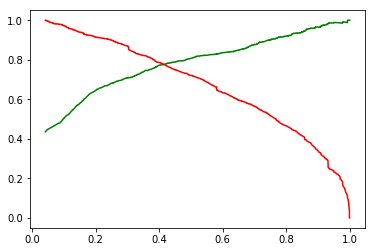

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7829,1,0.161776,0,1,1,0,0,0,0,0,0,0,0,0
7723,0,0.664599,1,1,1,1,1,1,1,1,0,0,0,1
8347,1,0.694536,1,1,1,1,1,1,1,1,0,0,0,1
8559,0,0.118512,0,1,1,0,0,0,0,0,0,0,0,0
6927,0,0.298182,0,1,1,1,0,0,0,0,0,0,0,0


In [126]:
    # Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136505239308978

In [127]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1712,  342],
       [ 316, 1161]], dtype=int64)

In [128]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Calculate Precision

TP/(TP+FP)

0.7724550898203593

In [130]:
# Calculate Recall

TP/(TP+FN)

0.7860528097494922